The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 

The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [4]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge, Lasso,ElasticNet

from sklearn.model_selection import KFold , StratifiedKFold

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import the data
train = pd.read_csv('train_big_mart.csv')
test = pd.read_csv('test_big_mart.csv')

train.shape, test.shape   # test set contains 11 columns as we have to predict the y-variable for the test

((8523, 12), (5681, 11))

### Framework of Model Building

**Exploratory Data Analysis**

    * Univariate Analysis
    * Bivariate Analysis
    * Missing Value imputation
    * Outlier Treatment
    * Feature Engineering
    * Statistical Hypothesis testing
    * Categorical Variable Analysis & Encoding
    * Scaling And Transformation
 
Note: post EDA you have to enter the Pre Modeling State.

**Models**

    * Base Models - Average in case of Linear Regression
    * In Case of classification- The highest Frequency
    * Linear regression 
    * Tree Based Model - Decision Tree, RandomForest, Gradient Boosting machines etc.
    * Remember that all the models shall be Cross Validated Models.

In [6]:
# Combine the train and test set

combined = pd.concat([train,test],ignore_index=True)
combined.shape,train.shape,test.shape

((14204, 12), (8523, 12), (5681, 11))

### Univariate Analysis

* It represents Single variable Analysis
* Num Vars : Distplot/Histogram/hist
* Cat Vars: Countplot

In [7]:
# Lets pull the list of num vars:
nums = combined.select_dtypes(include=np.number).columns

cats = combined.select_dtypes(exclude=np.number).columns

<Figure size 1500x1000 with 0 Axes>

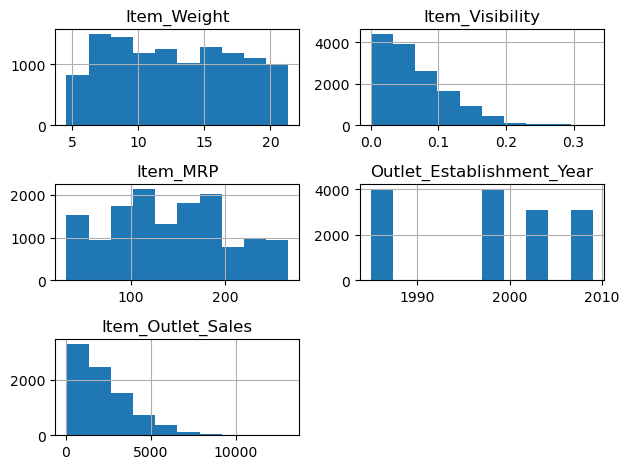

In [8]:
plt.figure(figsize=(15,10))
combined.loc[:,nums].hist()
plt.tight_layout()
plt.show()

Inference:
* Item_Weight is uniform in shape, as it  hence, we can say it willn't have any relationship with y-variable
* Item_MRP is multimodel data, it it has many peaks.
* The categorical data will have the bars like Outlet_Establishment Year
* Sales and Item_Visibility are positively skewed.

In [9]:
# 5 point summary of the data:

combined.loc[:,nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


* If the Std is zero, then the column doesn't have any relationship with y_variable and we will not need that column in our data.

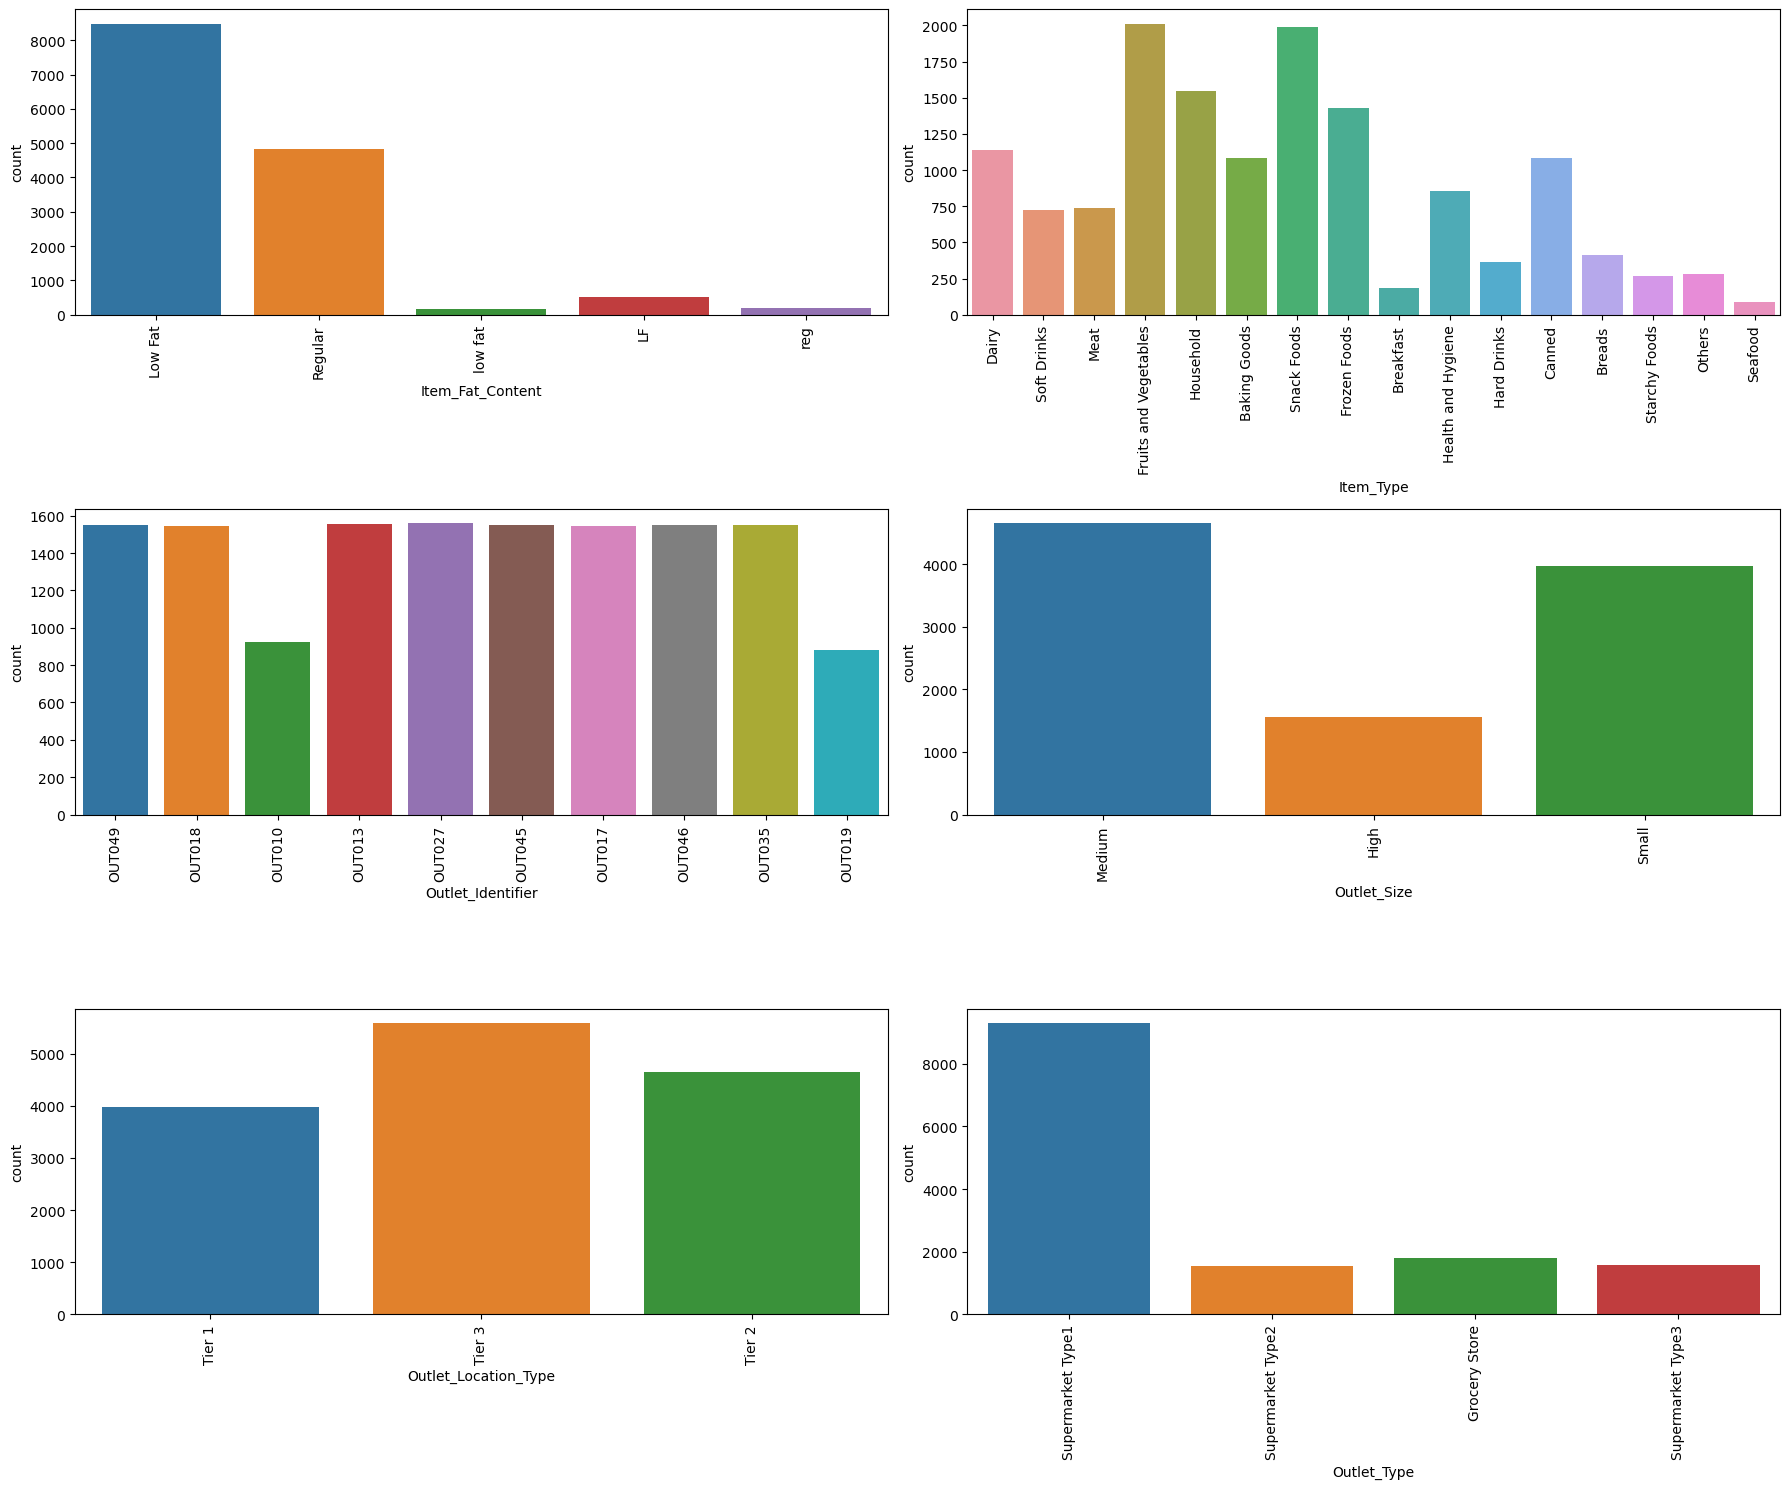

In [10]:
# cats
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

nrows = 3
ncols = 2
iterator = 1
plt.figure(figsize=(18,15))
for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(x=i,data=combined)
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
    

* The Item type like snack food, vegetables, fruits are top selling items.
* Frequency of outlets is highest in tier 3 cities.
* Low Fat products are sold the most.
* Outlets of Medium size are more than the large and small sized outlet.

### Bivariate Analysis

* It represents relationship between independent variable and dependent variable
* Cat vs Num = BoxPlot
* Cat vs Cat = crosstab
* Num vs Num = Scatterplot/Regressionplot

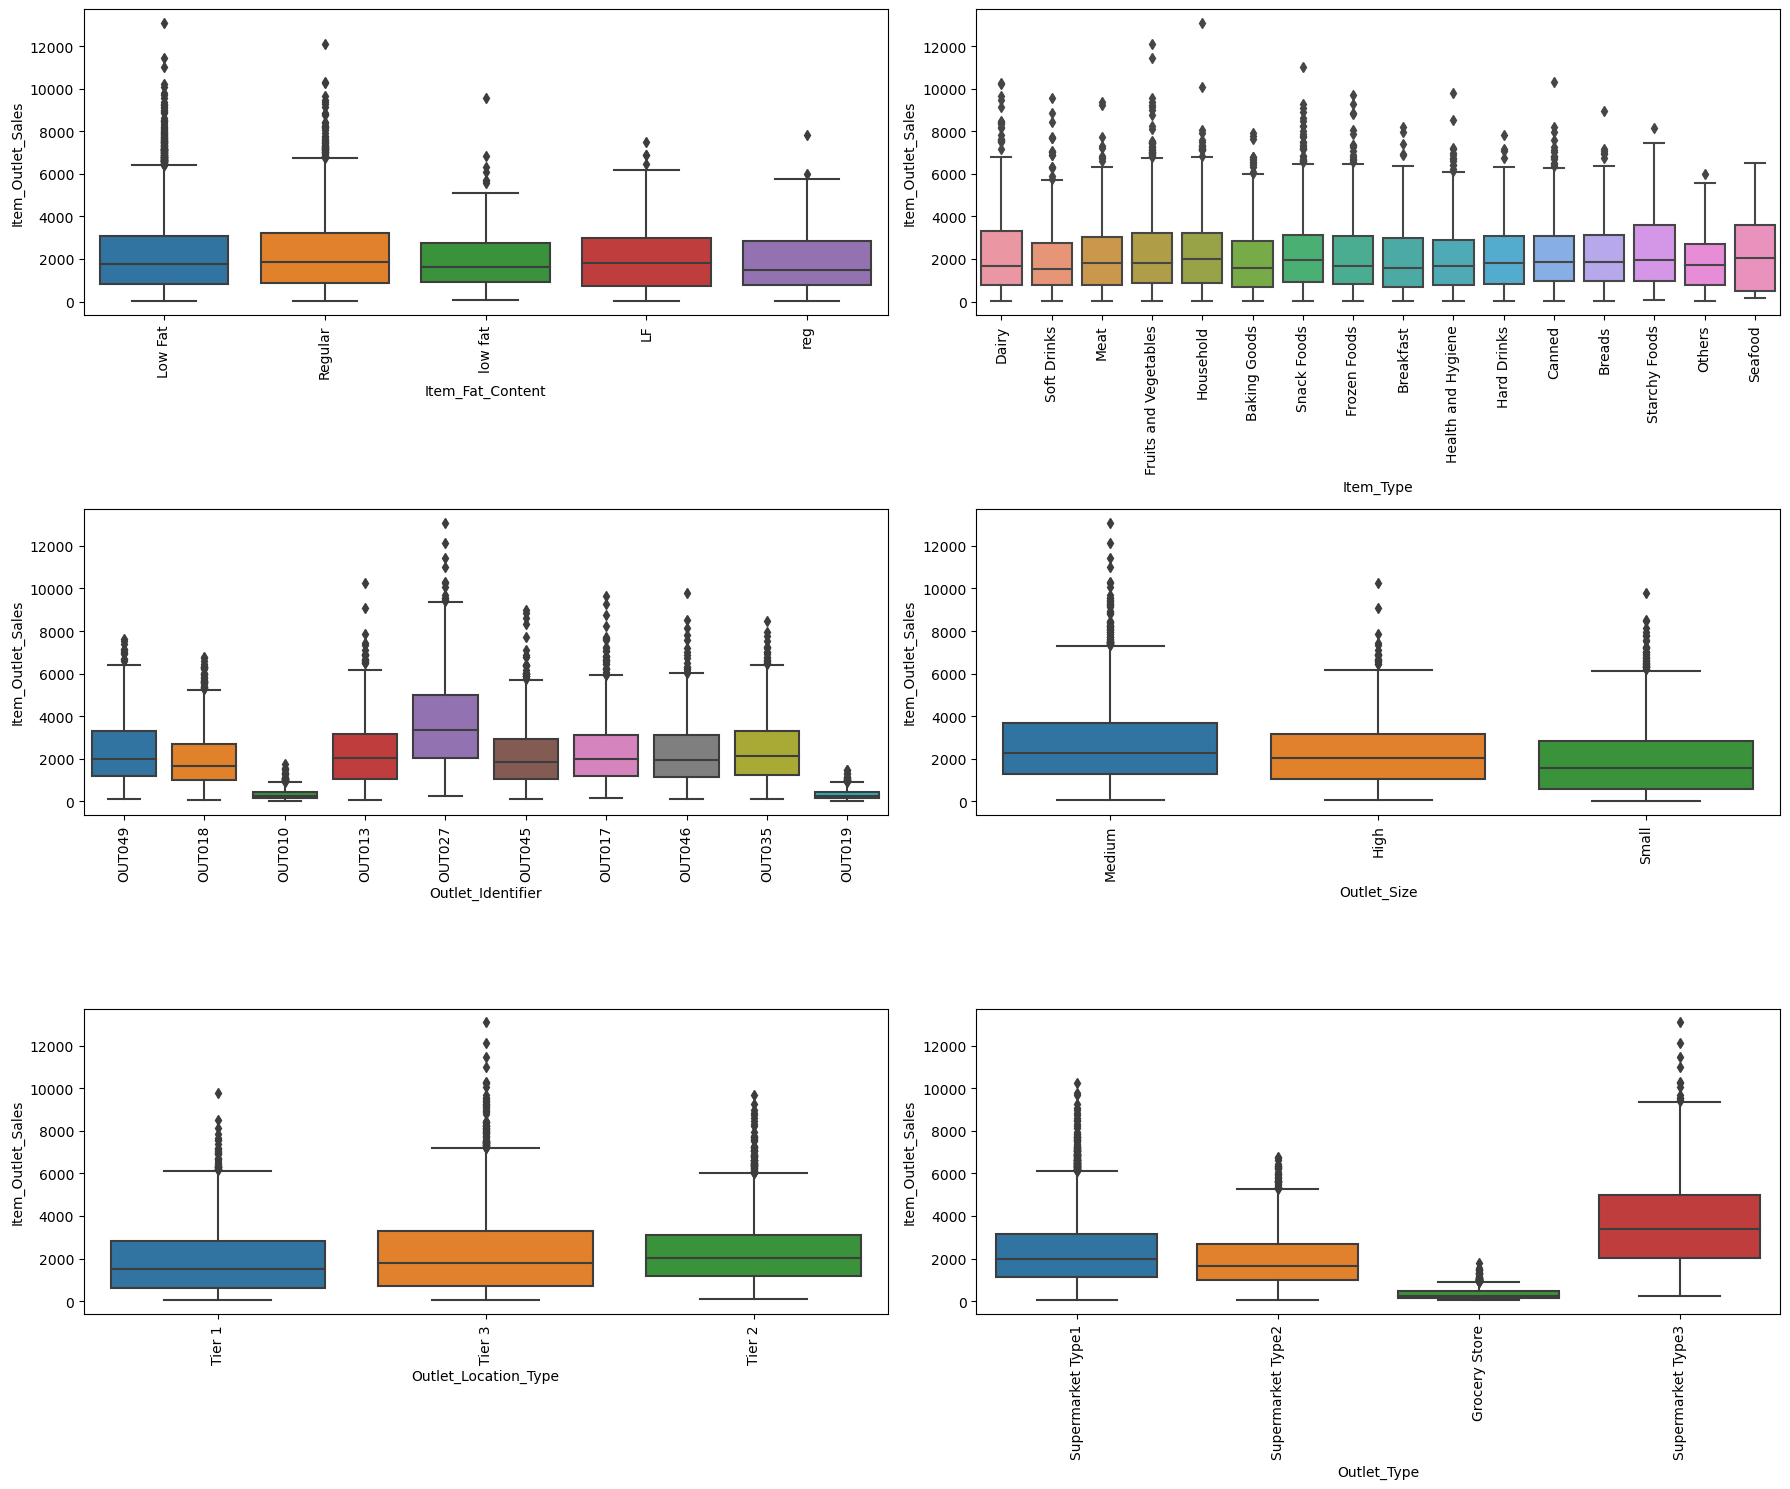

In [11]:
# cats
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

nrows = 3
ncols = 2
iterator = 1
plt.figure(figsize=(18,15))
for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(x=i,data=combined,y=combined['Item_Outlet_Sales'])
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* Outlet 27 are the ones which are selling the highest.
* Low fat items are selling more.
* Household are selling the most.
* All the plots shows outliers.
* Outlet size of medium are greater in number.
* Tier 3 cities have the highest sales.
* Super market type 3 has the highest sales.

In [12]:
combined['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [13]:
combined['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [14]:
# combined.Item_Fat_Content.replace(to_replace= ['low fat', 'LF', 'reg'], value = ['Low Fat','Low Fat', 'Regular'],  inplace = True)

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

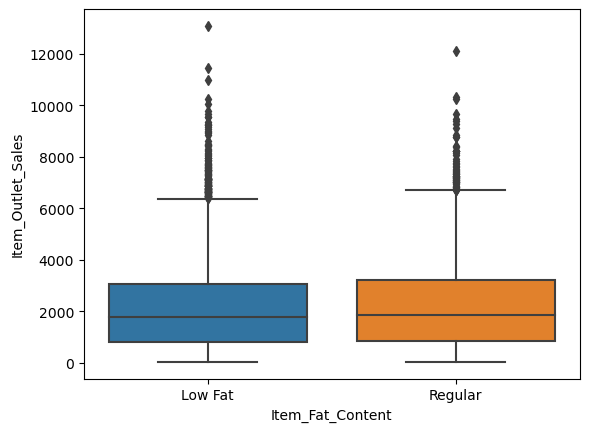

In [15]:
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=combined)

In [16]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

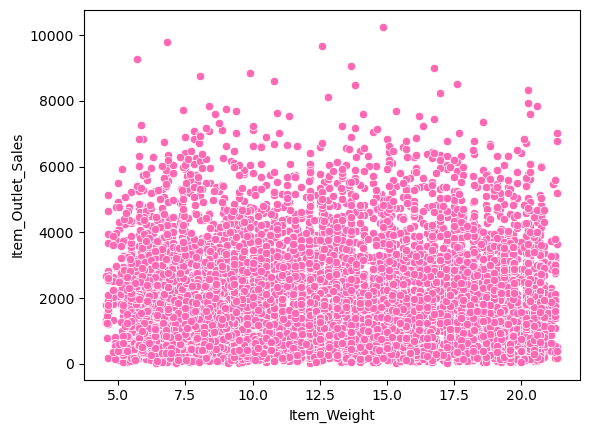

In [17]:
# Item Weight vs sales
sns.scatterplot(x="Item_Weight",y='Item_Outlet_Sales',data=combined,color='hotpink')
plt.show()

Inference: Weight has not relation with sales.

In [18]:
# Pull a dataFrame head where Item Weight is Missing
combined.loc[combined.Item_Weight.isnull(),].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [19]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


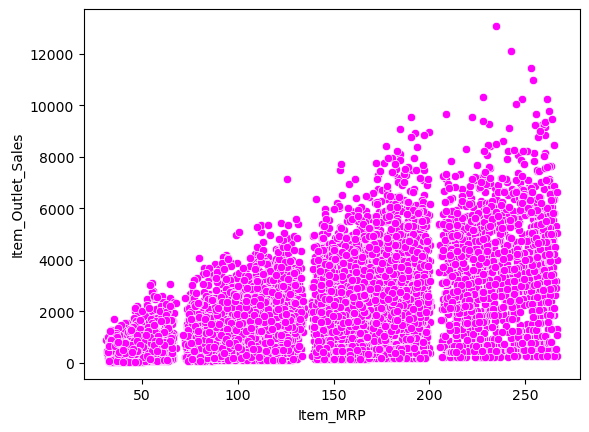

In [20]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=combined,color='magenta')
plt.show()

Inference:
* Since, we know that the MRP is combined and thus we see a combined effect with Sales.
* We Understand that the MRP is Multimodal data which leads to multiple transactions combined together.
* Hence, we can conclude that there is combination effect on MRP vs Sales..

In [21]:
combined.loc[combined.Item_Identifier=='FDP10','Item_Weight']

7         NaN
585      19.0
2623     19.0
3382     19.0
4585     19.0
6087     19.0
7883     19.0
11896    19.0
12371    19.0
13327     NaN
Name: Item_Weight, dtype: float64

In [22]:
# Dictionary...

combined.groupby('Item_Identifier')['Item_Weight'].mean().to_dict()

{'DRA12': 11.6,
 'DRA24': 19.35,
 'DRA59': 8.27,
 'DRB01': 7.39,
 'DRB13': 6.115,
 'DRB24': 8.785,
 'DRB25': 12.3,
 'DRB48': 16.75,
 'DRC01': 5.92,
 'DRC12': 17.85,
 'DRC13': 8.26,
 'DRC24': 17.85,
 'DRC25': 5.73,
 'DRC27': 13.8,
 'DRC36': 13.0,
 'DRC49': 8.67,
 'DRD01': 12.1,
 'DRD12': 6.96,
 'DRD13': 15.0,
 'DRD15': 10.6,
 'DRD24': 13.85,
 'DRD25': 6.135,
 'DRD27': 18.75,
 'DRD37': 9.8,
 'DRD49': 9.895,
 'DRD60': 15.7,
 'DRE01': 10.1,
 'DRE03': 19.6,
 'DRE12': 4.589999999999999,
 'DRE13': 6.28,
 'DRE15': 13.35,
 'DRE25': 15.35,
 'DRE27': 11.85,
 'DRE37': 13.5,
 'DRE48': 8.43,
 'DRE49': 20.75,
 'DRE60': 9.395,
 'DRF01': 5.655,
 'DRF03': 19.1,
 'DRF13': 12.1,
 'DRF15': 18.35,
 'DRF23': 4.61,
 'DRF25': 9.0,
 'DRF27': 8.93,
 'DRF36': 16.1,
 'DRF37': 17.25,
 'DRF48': 5.73,
 'DRF49': 7.2700000000000005,
 'DRF51': 15.75,
 'DRF60': 10.8,
 'DRG01': 14.8,
 'DRG03': 14.5,
 'DRG11': 6.385,
 'DRG13': 17.25,
 'DRG15': 6.13,
 'DRG23': 8.88,
 'DRG25': 10.5,
 'DRG27': 8.895,
 'DRG36': 14.15,
 'DRG37'

In [23]:
# Impute the Missing Values

combined['Item_Weight']=combined.groupby('Item_Identifier')['Item_Weight'].apply(lambda x:x.fillna(x.mean()))

In [24]:
combined['Item_Weight'].isnull().sum()

0

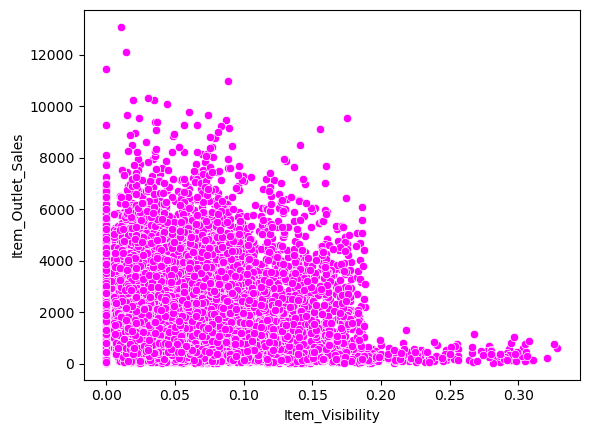

In [25]:
sns.scatterplot(data=combined,x='Item_Visibility',y='Item_Outlet_Sales',color='magenta')
plt.show()

In [26]:
combined['Item_Visibility']=combined.groupby('Item_Identifier')['Item_Weight'].apply(lambda x:x.replace(to_replace=0,value= x.mean()))

In [27]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [28]:
combined.loc[combined.Outlet_Size.isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,19.200,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,16.200,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,19.200,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,13.000,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,5.925,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [29]:
combined.loc[combined.Outlet_Size.isnull()]["Outlet_Type"].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [30]:
combined.groupby(['Outlet_Identifier','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Identifier  Outlet_Type        Outlet_Size
OUT013             Supermarket Type1  High           1553
OUT018             Supermarket Type2  Medium         1546
OUT019             Grocery Store      Small           880
OUT027             Supermarket Type3  Medium         1559
OUT035             Supermarket Type1  Small          1550
OUT046             Supermarket Type1  Small          1550
OUT049             Supermarket Type1  Medium         1550
Name: Outlet_Size, dtype: int64

In [31]:
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Size']='Small'

In [32]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

There is no missing value present in the data. So, we move to he next step i.e. Feature Engineering

### Feature Engineering

* Item Indetifier

In [33]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,9.30,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,5.92,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [34]:
combined.Item_Identifier[0][:2]

'FD'

In [35]:
ids = []
for i in combined.Item_Identifier:
    ids.append(i[:2])

In [36]:
combined['Item_IDS']=pd.Series(ids)

In [37]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS
0,FDA15,9.30,Low Fat,9.30,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,5.92,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,17.50,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,19.20,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,8.93,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [38]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [39]:
perish = ['Dairy','Meat','Fruits and Vegetables',
          'Breakfast','Breads','Starchy Foods','Seafood']


In [40]:
def per(x):
    if x in perish:
        return('Perishables')
    else:
        return('Non_Presihables')

In [41]:
combined['Item_Type_cat']=combined.Item_Type.apply(per)

<Axes: xlabel='Item_Type_cat', ylabel='Item_Outlet_Sales'>

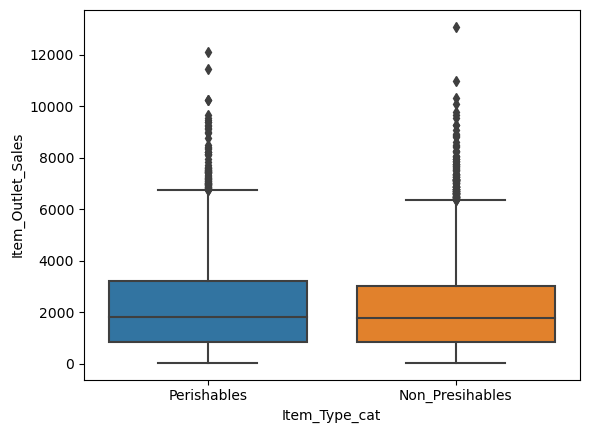

In [42]:
# Pattern between Item Type Cat vs Sales

sns.boxplot(x = "Item_Type_cat", y  ="Item_Outlet_Sales",
           data = combined)

In [43]:
combined.loc[combined.Item_IDS=='NC','Item_Fat_Content']=='Non_Edible'

4        False
16       False
22       False
25       False
31       False
         ...  
14162    False
14164    False
14165    False
14195    False
14201    False
Name: Item_Fat_Content, Length: 2686, dtype: bool

In [44]:
# Outlets...
top = ['OUT027','OUT013']
worst = ['OUT010','OUT019']

def outlets(x):
    if x in top:
        return('Best')
    elif x in worst:
        return('Worst')
    else:
        return('Good')

In [45]:
combined['Outlets']=combined.Outlet_Identifier.apply(outlets)

<Axes: xlabel='Outlets', ylabel='Item_Outlet_Sales'>

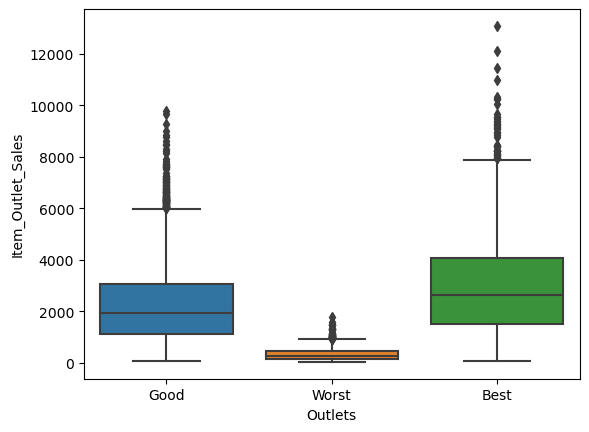

In [46]:
# Pattern between Outlets Cat vs Sales

sns.boxplot(x = "Outlets", y  ="Item_Outlet_Sales",
           data = combined)

In [47]:
# Drop the Unnecessay columns:
# Drop the Unnecessary Columns now
combined.drop(["Item_Identifier", "Item_Type", "Outlet_Identifier",
              "Outlet_Establishment_Year"], axis =1, 
              inplace = True)

## Encoding

In [48]:
# Categorical Encoding:

# Ordinal Encoding

# One hot encoding

In [49]:
combined.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Item_Type_cat,Outlets
0,9.30,Low Fat,9.30,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,Good
1,5.92,Regular,5.92,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Presihables,Good
2,17.50,Low Fat,17.50,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,Good
3,19.20,Regular,19.20,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,Perishables,Worst
4,8.93,Low Fat,8.93,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Presihables,Best


In [50]:
combined

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Item_Type_cat,Outlets
0,9.30,Low Fat,9.30,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,Good
1,5.92,Regular,5.92,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Presihables,Good
2,17.50,Low Fat,17.50,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,Good
3,19.20,Regular,19.20,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,Perishables,Worst
4,8.93,Low Fat,8.93,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Presihables,Best
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,Regular,10.50,141.3154,Small,Tier 1,Supermarket Type1,NaN,FD,Non_Presihables,Good
14200,7.60,Regular,7.60,169.1448,Medium,Tier 3,Supermarket Type2,NaN,FD,Perishables,Good
14201,10.00,Low Fat,10.00,118.7440,Small,Tier 2,Supermarket Type1,NaN,NC,Non_Presihables,Good
14202,15.30,Regular,15.30,214.6218,Small,Tier 2,Supermarket Type1,NaN,FD,Non_Presihables,Good


In [51]:
# Outlet Size
mapped_size = {'Medium':3,'High':2,'Small':1}
mapped_outlet = {'Best':3,'Good':2,'Worst':1}
mapped_loc = {'Tier 3':3,'Tier 1':2,'Tier 2':1}

# combined.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].describe

In [52]:
combined['Outlet_Size']=combined['Outlet_Size'].map(mapped_size)
combined['Outlets']=combined['Outlets'].map(mapped_outlet)
combined['Outlet_Location_Type']=combined['Outlet_Location_Type'].map(mapped_loc)

In [53]:
# One hot encoding
dummy = pd.get_dummies(combined,drop_first=True)

### Train and test split

In [54]:
# Split the Data into Train and Test

newtrain = dummy.loc[0:train.shape[0]-1,]
newtest = dummy.loc[train.shape[0]:,]

In [55]:
# Drop the Target from the test Set
newtest.drop('Item_Outlet_Sales',axis=1,inplace=True)

In [56]:
train.shape,test.shape,newtrain.shape,newtest.shape

((8523, 12), (5681, 11), (8523, 14), (5681, 13))

## Model Building

In [75]:
kfold = KFold(n_splits=5,shuffle=True,random_state=0)

X = newtrain.drop('Item_Outlet_Sales',axis=1)
y=newtrain.Item_Outlet_Sales

lr = LinearRegression()

predictions=[]
for train_index,test_index in kfold.split(X,y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    validn_test = X.iloc[test_index]
    validn_ytest = y.iloc[test_index]
    
    # Model
    
    pred = lr.fit(xtrain,ytrain).predict(newtest)
    predictions.append(pred)


In [58]:
finalpred = pd.DataFrame(predictions).T.mean(axis=1)

In [76]:
newtest.shape

(5681, 13)

In [61]:
submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
             "Outlet_Identifier": test.Outlet_Identifier, 
             "Item_Outlet_Sales": np.abs(finalpred)})

In [62]:
# Export it as CSV
submission.to_csv('LRMODEL_Bigmart.csv',index=False)

In [63]:
cd

C:\Users\Asus


In [64]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

X = newtrain.drop("Item_Outlet_Sales", axis =1)
y = newtrain.Item_Outlet_Sales

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

predictions = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    validn_test = X.iloc[test_index]
    validn_ytest = y.iloc[test_index]
# Model
    pred = rf.fit(xtrain, ytrain).predict(newtest)
    predictions.append(pred)

In [65]:
submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
             "Outlet_Identifier": test.Outlet_Identifier, 
             "Item_Outlet_Sales": np.abs(finalpred)})

In [66]:
# Export it as CSV
submission.to_csv('RFMODEL_Bigmart.csv',index=False)

In [67]:
cd

C:\Users\Asus
